In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
#load the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
#for testing on my image
num_px = (train_set_x_orig.shape[2])

In [4]:
#flatten the dataset(train and test) into a 1D array
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [5]:
#standardize the dataset
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

In [6]:
#make a sigmoid function
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [7]:
#initialsize the parameters
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0

    return w,b

In [8]:
#forward and backward propagation
#find the cost
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)
    cost=np.squeeze(cost)
    grade={"dw":dw,
          "db":db}
    return grade,cost

In [9]:
#optimize the function and decrease the cost
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        
        dw=grads["dw"]
        db=grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("cost after iteration %i: %f"%(i,cost))
    parms= {"w":w,
           "b":b}
    grads = {"dw":dw,
            "db":db}
    return parms,grads,costs

In [10]:
#if prediction >50% then its a cat and prediction <50% its not a cat 
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):  
        Y_prediction[0,i]=np.where(A[0,i]>0.5,1,0)
    
    return Y_prediction

In [11]:
#merge all teh function intoa model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)


    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [12]:
#train your model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iteration 0: 0.693147
cost after iteration 100: 0.584508
cost after iteration 200: 0.466949
cost after iteration 300: 0.376007
cost after iteration 400: 0.331463
cost after iteration 500: 0.303273
cost after iteration 600: 0.279880
cost after iteration 700: 0.260042
cost after iteration 800: 0.242941
cost after iteration 900: 0.228004
cost after iteration 1000: 0.214820
cost after iteration 1100: 0.203078
cost after iteration 1200: 0.192544
cost after iteration 1300: 0.183033
cost after iteration 1400: 0.174399
cost after iteration 1500: 0.166521
cost after iteration 1600: 0.159305
cost after iteration 1700: 0.152667
cost after iteration 1800: 0.146542
cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


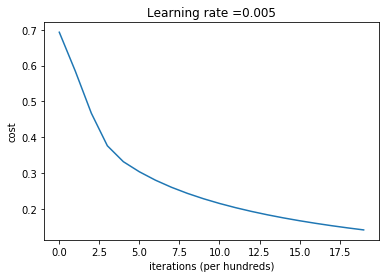

In [13]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



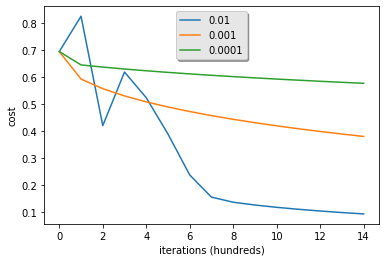

In [14]:
#for different learning rate
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\Users\Hrishikesh D S\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
C:\Users\Hrishikesh D S\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 1.0, your algorithm predicts a "cat" picture.


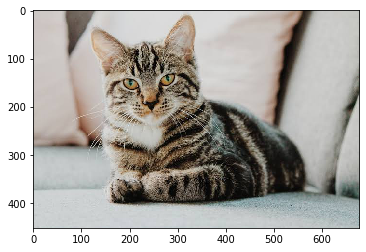

In [19]:
#try with your own image
my_image = "my_image.jpg"   

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")